# Now let us find the RMSE and R Squared for each of the k features and select the optimal number

In [10]:
# import pickle
# import pandas as pd
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # Load model predictions
# with open("Data/model_predictions_simulated.pkl", "rb") as f:
#     model_predictions = pickle.load(f)

# summary = []

# for dataset_name, k_data in model_predictions.items():
#     val_rmse_scores = {}
#     val_r2_scores = {}

#     for k, models in k_data.items():
#         if "LinearRegression" not in models or "error" in models["LinearRegression"]:
#             continue

#         try:
#             y_val = models["LinearRegression"]["y_val"]
#             y_val_pred = models["LinearRegression"]["y_val_pred"]
#             y_test = models["LinearRegression"]["y_test"]
#             y_test_pred = models["LinearRegression"]["y_test_pred"]

#             # Compute validation metrics
#             rmse_val = mean_squared_error(y_val, y_val_pred) ** 0.5
#             r2_val = r2_score(y_val, y_val_pred)

#             val_rmse_scores[k] = rmse_val
#             val_r2_scores[k] = r2_val

#         except Exception as e:
#             print('It hit here')
#             continue

#     if len(val_rmse_scores) == 0:
#         continue  # Skip if nothing was computed

#     # Get k with best RMSE and best R² on validation
#     best_k_rmse = min(val_rmse_scores, key=val_rmse_scores.get)
#     best_k_r2 = max(val_r2_scores, key=val_r2_scores.get)

#     # Compute test RMSE and R² at best k
#     test_rmse = mean_squared_error(
#         model_predictions[dataset_name][best_k_rmse]["LinearRegression"]["y_test"],
#         model_predictions[dataset_name][best_k_rmse]["LinearRegression"]["y_test_pred"]
#     ) ** 0.5

#     test_r2 = r2_score(
#         model_predictions[dataset_name][best_k_r2]["LinearRegression"]["y_test"],
#         model_predictions[dataset_name][best_k_r2]["LinearRegression"]["y_test_pred"]
#     )

#     summary.append({
#         "Dataset": dataset_name,
#         "Best_k_RMSE": best_k_rmse,
#         "Val_RMSE": val_rmse_scores[best_k_rmse],
#         "Test_RMSE": test_rmse,
#         "Best_k_R2": best_k_r2,
#         "Val_R2": val_r2_scores[best_k_r2],
#         "Test_R2": test_r2
#     })

# # Convert to DataFrame
# df_summary = pd.DataFrame(summary)

# Finding the RMSE and R Squared for Dynamically Selected K

In [11]:
# # Load dynamic model predictions
# with open("Data/dynamic_model_predictions_simulated.pkl", "rb") as f:
#     dynamic_model_predictions = pickle.load(f)

# # Extract RMSE and R² for Linear Regression
# summary_dynamic_lr = []

# for dataset_name, model_data in dynamic_model_predictions.items():
#     lr_data = model_data.get("LinearRegression", {})

#     if "error" in lr_data:
#         print('IT HIT HERE')
#         continue

#     try:
#         y_test = lr_data["y_test"]
#         y_test_pred = lr_data["y_test_pred"]

#         test_mse = mean_squared_error(y_test, y_test_pred)
#         test_rmse = np.sqrt(test_mse)
#         test_r2 = r2_score(y_test, y_test_pred)

#         summary_dynamic_lr.append({
#             "Dataset": dataset_name,
#             "Selected_k": model_data.get("k", "N/A"),
#             "Test_RMSE": test_rmse,
#             "Test_R2": test_r2
#         })
#     except Exception as e:
#         print(f"⚠️ Error in {dataset_name}: {e}")
#         continue

# # Convert to DataFrame
# df_dynamic_lr_summary = pd.DataFrame(summary_dynamic_lr)

Concatenating the two

In [12]:
# # Drop 'Val_RMSE' and 'Val_R2' from df_summary
# df_summary_trimmed = df_summary.drop(columns=['Val_RMSE', 'Val_R2'])

# # Rename columns in df_dynamic_lr_summary for clarity
# df_dynamic_renamed = df_dynamic_lr_summary.rename(columns={
#     "Selected_k": "Selected_k_Dynamic",
#     "Test_RMSE": "Test_RMSE_Dynamic",
#     "Test_R2": "Test_R2_Dynamic"
# })

# # Merge the two DataFrames on 'Dataset'
# final_df = pd.merge(df_summary_trimmed, df_dynamic_renamed, on='Dataset')

Comparing results

In [13]:
# final_df["Better_RMSE_Dynamic"] = final_df["Test_RMSE_Dynamic"] < final_df["Test_RMSE"]
# final_df["Better_R2_Dynamic"] = final_df["Test_R2_Dynamic"] > final_df["Test_R2"]

# # Convert boolean values to "Yes"/"No"
# final_df["Better_RMSE_Dynamic"] = final_df["Better_RMSE_Dynamic"].map({True: "Yes", False: "No"})
# final_df["Better_R2_Dynamic"] = final_df["Better_R2_Dynamic"].map({True: "Yes", False: "No"})


# Comparing time differences

In [3]:
import pickle 

# Step 1: Load selected_feature_data
with open("Data/selected_feature_data_simulated.pkl", "rb") as f:
    selected_feature_data = pickle.load(f)

In [4]:
import pandas as pd

# Initialize result dictionary
time_summary = {}

# Loop through each dataset
for dataset_name, inner_dict in selected_feature_data.items():
    total_time = 0.0
    for k, result in inner_dict.items():
        # Accumulate time if 'time' key exists
        if 'time' in result:
            total_time += result['time']
    time_summary[dataset_name] = total_time

# Convert to DataFrame
df_time_summary = pd.DataFrame.from_dict(time_summary, orient='index', columns=['Total_Time'])
df_time_summary.index.name = 'Dataset'
df_time_summary.reset_index(inplace=True)

# Display result
print(df_time_summary)


    Dataset   Total_Time
0    sim_10     0.515944
1    sim_20     4.228257
2    sim_30    15.305941
3    sim_40    80.614777
4    sim_50   147.415637
5    sim_60   255.973929
6    sim_70   420.252987
7    sim_80   467.745783
8    sim_90   346.891699
9   sim_100   473.573097
10  sim_110   628.835800
11  sim_120   811.158856
12  sim_130  1416.585585
13  sim_140  3666.106617
14  sim_150  4099.285659


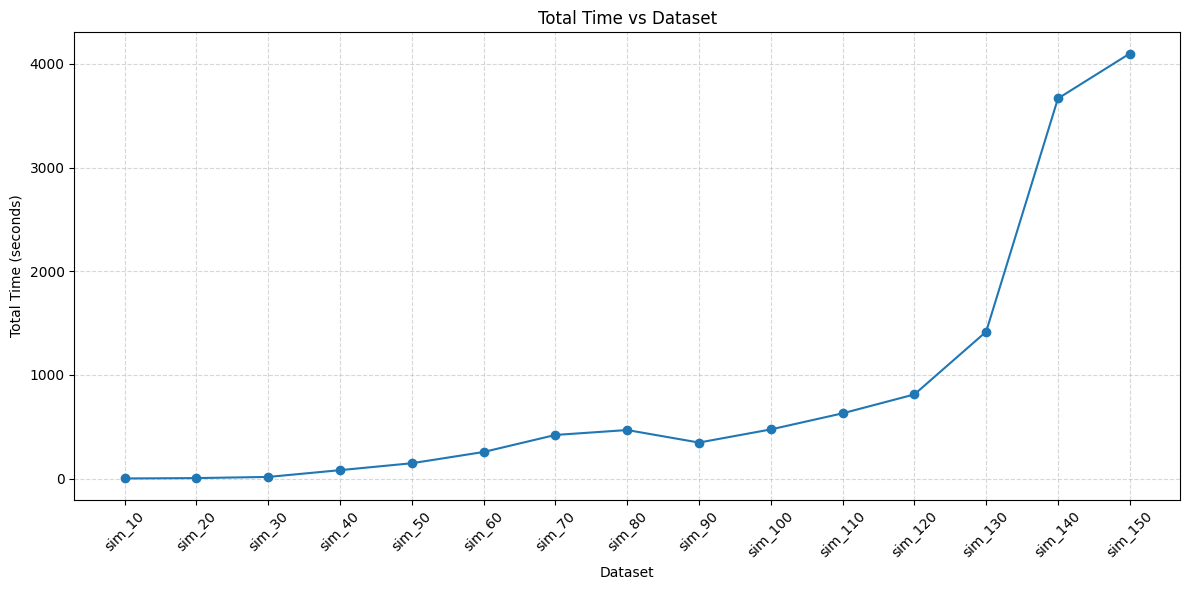

In [5]:
import matplotlib.pyplot as plt

# Assuming df_time_summary is your DataFrame
plt.figure(figsize=(12, 6))
plt.plot(df_time_summary['Dataset'], df_time_summary['Total_Time'], marker='o', linestyle='-')

# Formatting
plt.title('Total Time vs Dataset')
plt.xlabel('Dataset')
plt.ylabel('Total Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


In [6]:
# Step 1: Load selected_feature_data
with open("Data/dynamic_selected_features_simulated.pkl", "rb") as f:
    selected_feature_data_dynamic = pickle.load(f)

In [8]:
import pandas as pd

# Initialize list to hold rows
rows = []

# Loop through each dataset in the dictionary
for dataset_name, data in selected_feature_data_dynamic.items():
    total_time = data['time']
    rows.append({'Dataset': dataset_name, 'Total_Time': total_time})

# Create DataFrame
df_dynamic_time = pd.DataFrame(rows)

# Optional: sort by Dataset if needed
df_dynamic_time['Feature_Count'] = df_dynamic_time['Dataset'].str.extract(r'sim_(\d+)').astype(int)
df_dynamic_time = df_dynamic_time.sort_values('Feature_Count').reset_index(drop=True)

# Display result
print(df_dynamic_time)


    Dataset  Total_Time  Feature_Count
0    sim_10    0.173739             10
1    sim_20    0.461948             20
2    sim_30    1.081430             30
3    sim_40    1.214435             40
4    sim_50    2.106065             50
5    sim_60    2.896918             60
6    sim_70    5.093747             70
7    sim_80    5.222298             80
8    sim_90    4.879816             90
9   sim_100    7.622101            100
10  sim_110    8.305419            110
11  sim_120   12.231927            120
12  sim_130   13.795823            130
13  sim_140   13.171957            140
14  sim_150   16.409802            150


In [9]:
# Merge the two DataFrames on 'Dataset'
df_combined_time = pd.merge(
    df_time_summary[['Dataset', 'Total_Time']],  # original time
    df_dynamic_time[['Dataset', 'Total_Time']],  # dynamic time
    on='Dataset',
    suffixes=('_Original', '_Dynamic')
)

# Optional: add feature count and sort
df_combined_time['Feature_Count'] = df_combined_time['Dataset'].str.extract(r'sim_(\d+)').astype(int)
df_combined_time = df_combined_time.sort_values('Feature_Count').reset_index(drop=True)

# Display result
print(df_combined_time)


    Dataset  Total_Time_Original  Total_Time_Dynamic  Feature_Count
0    sim_10             0.515944            0.173739             10
1    sim_20             4.228257            0.461948             20
2    sim_30            15.305941            1.081430             30
3    sim_40            80.614777            1.214435             40
4    sim_50           147.415637            2.106065             50
5    sim_60           255.973929            2.896918             60
6    sim_70           420.252987            5.093747             70
7    sim_80           467.745783            5.222298             80
8    sim_90           346.891699            4.879816             90
9   sim_100           473.573097            7.622101            100
10  sim_110           628.835800            8.305419            110
11  sim_120           811.158856           12.231927            120
12  sim_130          1416.585585           13.795823            130
13  sim_140          3666.106617           13.17

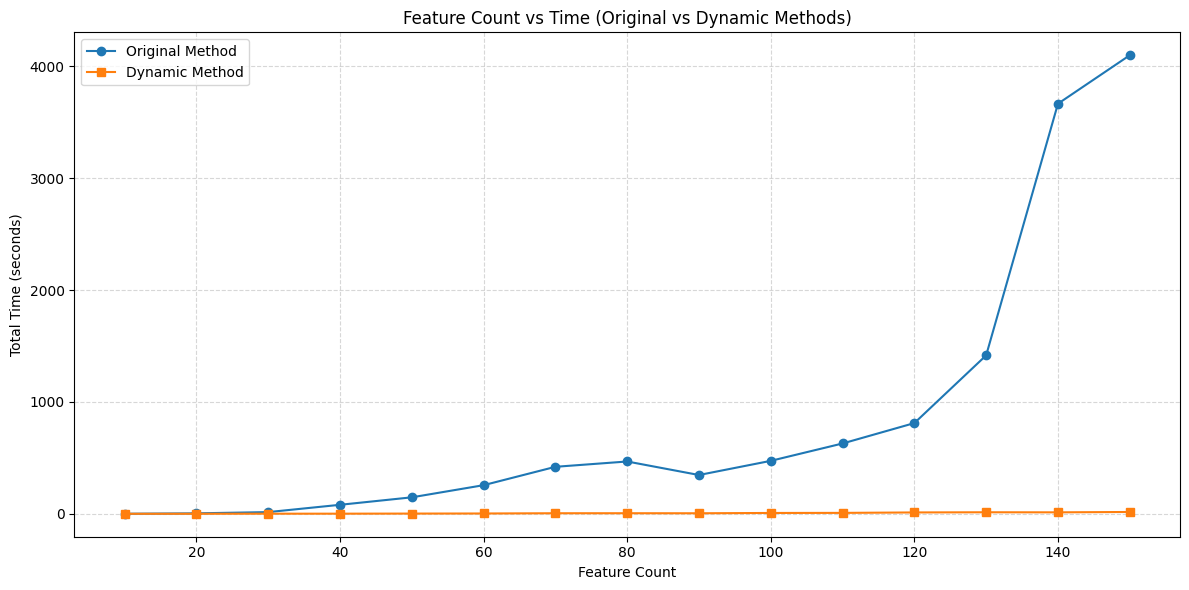

In [14]:
import matplotlib.pyplot as plt

# Plot setup
plt.figure(figsize=(12, 6))

# Plot both time series
plt.plot(df_combined_time['Feature_Count'], df_combined_time['Total_Time_Original'], 
         label='Original Method', marker='o', linestyle='-')

plt.plot(df_combined_time['Feature_Count'], df_combined_time['Total_Time_Dynamic'], 
         label='Dynamic Method', marker='s', linestyle='-')

# Labels and Title
plt.title('Feature Count vs Time (Original vs Dynamic Methods)')
plt.xlabel('Feature Count')
plt.ylabel('Total Time (seconds)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()


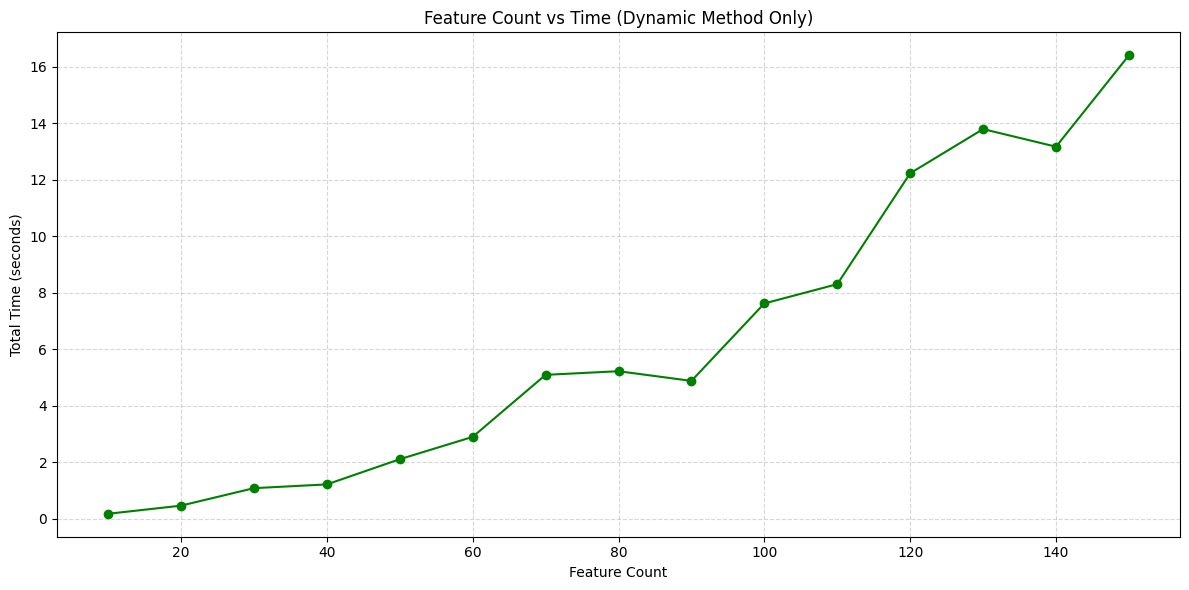

In [15]:
import matplotlib.pyplot as plt

# Plot setup
plt.figure(figsize=(12, 6))

# Plot Dynamic Method
plt.plot(df_combined_time['Feature_Count'], df_combined_time['Total_Time_Dynamic'],
         label='Dynamic Method', marker='o', linestyle='-', color='green')

# Labels and Title
plt.title('Feature Count vs Time (Dynamic Method Only)')
plt.xlabel('Feature Count')
plt.ylabel('Total Time (seconds)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()
